In [1]:
import requests as req
import pandas as pd
from nsepy import get_history
from datetime import date

In [6]:
apv_api_key = '2N8UEPVRC2AWTK6B'
apv_base_url = 'https://www.alphavantage.co'
size = 'compact'
ticker = 'NSE:TCS'

time_series_daily = req.get(apv_base_url + '/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=' + ticker + '&outputsize=' + size + '&apikey=' + apv_api_key)


dataframe = pd.DataFrame(time_series_daily)

# print(time_series_daily)

&lt;AxesSubplot:xlabel=&#39;Date&#39;&gt;

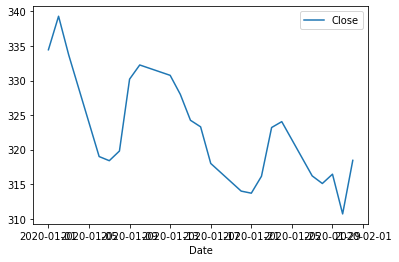

In [3]:
data = get_history(symbol="SBIN", start=date(2020,1,1), end=date(2020,1,31))
data_copy = data.copy()
filtered_data = data_copy.drop(columns=['Series', 'Prev Close', 'Last', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'])
data[['Close']].plot()